In [33]:
import clicker
import numpy as np
from sklearn import svm
import pickle
from matplotlib import pyplot as plt
from pylab import *
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score, KFold
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

In [ ]:
clicker.main()

In [34]:
#X.np and Y.np is the raw data
X=np.load('X_trn_raw.np')
Y=np.load('Y_trn_raw.np')
# X=np.load('X_trn_0.np',allow_pickle=True, fix_imports=True, encoding='latin1')
# Y=np.load('Y_trn_0.np',allow_pickle=True, fix_imports=True, encoding='latin1')

In [35]:
# Clean X arrays
length = [len(X[index]) for index in range(0, len(X))]
index = [i for i, x in enumerate(length) if x != 1600]

n=0
for ind in index:
    X=np.delete(X,ind-n, 0)
    Y=np.delete(Y,ind-n, 0)
    n+=1

In [36]:
X = np.array([list(X[index]) for index in range(0,len(X))], dtype=float32)
X = np.array(X.tolist())
Y = np.array(Y.tolist())
#Y = np.array(Y.tolist())
# print (Y.shape)
# print (X.shape)

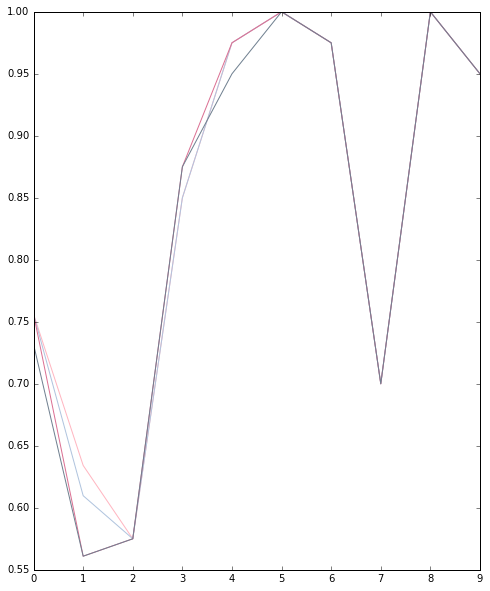

In [49]:
kf=KFold(len(X),n_folds=10)

penalties=[200,220,240,260]
#sizes = [100,200,300,400]
colors = ['lightpink','lightsteelblue','palevioletred','slategrey']
fig,ax = plt.subplots(1, 1, figsize = [8,10]) 

for penalty, color in zip(penalties, colors):
#for size, color in zip(sizes, colors):
    result = []
    for trn,tst in kf:

        Y_trn = Y[trn]
        X_trn = X[trn]

        X_tst =  X[tst]
        Y_true = Y[tst]

        clf=svm.SVC(C=penalty)
        clf.fit(X_trn,Y_trn)
        Y_pred = clf.predict(X_tst)
        err=0
        for count in range(len(X_tst)):
            #print Y_true[count]
            #print Y_pred[count]
            if Y_true[count] != Y_pred[count]:
                err += 1  
        num_correct = 1-float(err)/len(X_tst)
        result.append(num_correct)
        
    #ax.scatter(range(0, len(result)), result, c=color, s=20, edgecolor='')
    ax.plot(range(0,len(result)),result,color=color)
    

In [50]:
clf=svm.SVC(C=200.0)
clf.fit(X,Y)
with open('classifier_yiyange.pickle','wb') as f:
    pickle.dump(clf, f,fix_imports=True)

In [51]:
import submission_yiyange

SyntaxError: Missing parentheses in call to 'print' (submission_yiyange.py, line 53)

In [ ]:
### this will be replaced with the real test image ###
im_test = plt.imread('parking_test_preview.png')
###


# This function MUST take locations (loc) and an image (im) 
# as input parameters and return the feature vector
def my_feature_vector(loc, im, size = 10):
    w = size
    # a patch of the size w cenetered at loc is extracted as a feature vector
    patch = im[loc[1]-w:loc[1]+w, loc[0]-w:loc[0]+w]
    p = np.array(patch).flatten()
    return p 
  

## 10 preview test locations
### these will be replaced with the real set of 100 test locations ###
test_locs_labs = np.load('test_locations_and_labels_preview.np')

test_locs   = test_locs_labs[:,0:2]
test_labels = test_locs_labs[:,2]

X_test = []
for loc in test_locs:
    X_test.append( my_feature_vector(loc, im_test))

my_classifier = pickle.load(open('classifier_yiyange.pickle')) 

score = 0
for i, xtest in enumerate(X_test): 
  
  predicted = clf.predict(xtest) 
  
  if (test_labels[i] == 1.0)&(predicted == 1.0):
        score = score + 2
  
  if (test_labels[i] == 1.0)&(predicted == 0.0):
        score = score - 0.5
  
  if (test_labels[i] == 0.0)&(predicted == 1.0):
        score = score - 0.5
  
  if (test_labels[i] == 0.0)&(predicted == 0.0):
        score = score + 0.25

print (test_labels[i], predicted, score )

print ('You final Score is: %.2f' % score)